### 1. A nasty integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)


The expected value of the integral is 32


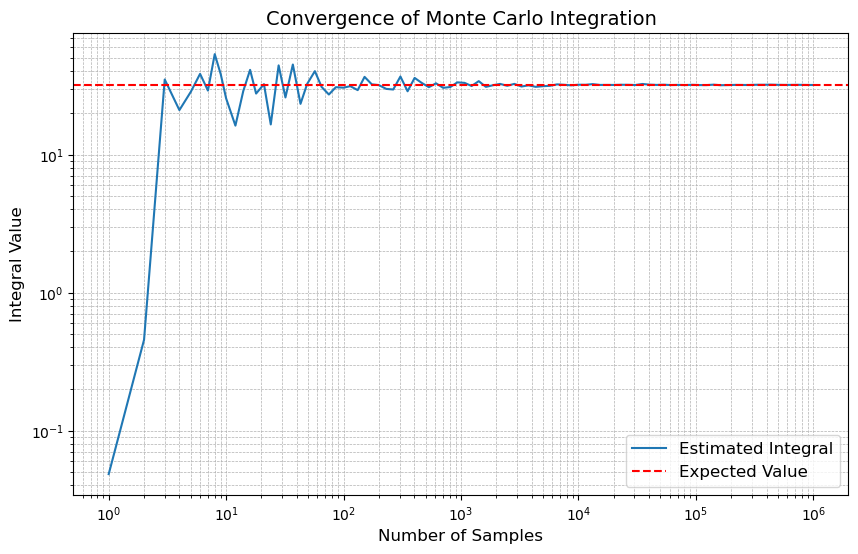

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares
import scipy 

def funzione_integranda(x, sigma):
    return x**3 * np.exp((-x**2)/(2*(sigma**2)))

# Definizione della funzione gaussiana per il fit
def gaussian(x, N, mu, sigma):
    return N * np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

sigma = 2
xmin = 0
xmax = 12

print(f"The expected value of the integral is {2*sigma**4}")

integral_values = []
n_samples = 10000  # Numero di iterazioni

#vector_samples = np.arange(100, 100000, 100)
vector_samples = np.unique(np.logspace(0,6,100,dtype=int))
for i in vector_samples:
    x = np.random.uniform(xmin, xmax, i)
    integral_values.append(np.mean(funzione_integranda(x, sigma)) * (xmax - xmin))

plt.figure(figsize=(10, 6))
plt.loglog(vector_samples, integral_values, label="Estimated Integral")
plt.axhline(2 * sigma**4, color='red', linestyle='--', label="Expected Value")
plt.xlabel("Number of Samples", fontsize=12)
plt.ylabel("Integral Value", fontsize=12)
plt.title("Convergence of Monte Carlo Integration", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### 2. Kicking horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)


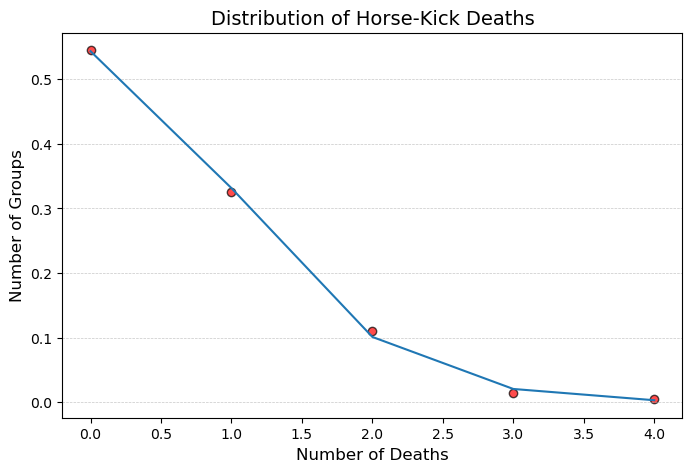

In [9]:
import scipy.stats

number_of_deaths = np.array([0,1,2,3,4])
number_of_groups = np.array([109, 65, 22, 3, 1])
freq = number_of_groups / np.sum(number_of_groups)
mean = np.average(number_of_deaths, weights=number_of_groups)

p = scipy.stats.poisson(mean).pmf(number_of_deaths)



plt.figure(figsize=(8, 5))
plt.scatter(number_of_deaths, freq, color='red', edgecolor='black', alpha=0.7)
plt.plot(number_of_deaths, p)
plt.xlabel("Number of Deaths", fontsize=12)
plt.ylabel("Number of Groups", fontsize=12)
plt.title("Distribution of Horse-Kick Deaths", fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()